In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ----- PART 1 - EDA and Preprocessing -------

In [5]:
df = pd.read_csv('cancer_classification.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


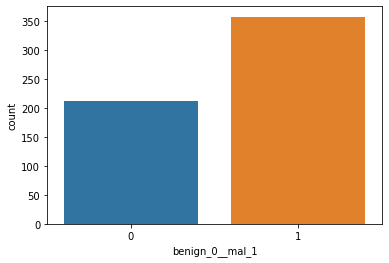

In [11]:
# for classification, good idea to do 
#     countplot (on benign and malignant tumors)
sns.countplot(x='benign_0__mal_1', data=df)

In [13]:
# correlation between features
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

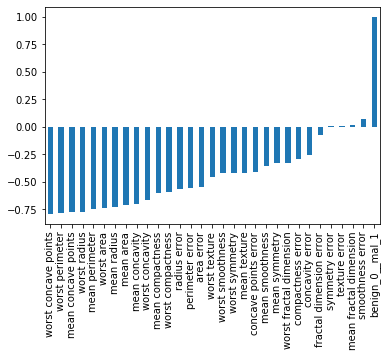

In [14]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

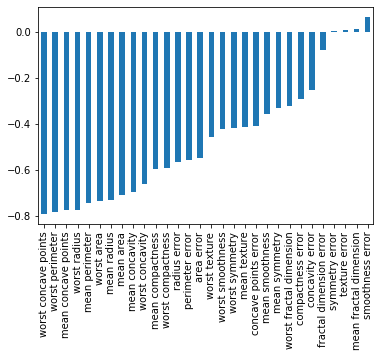

In [15]:
# drop the last one
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

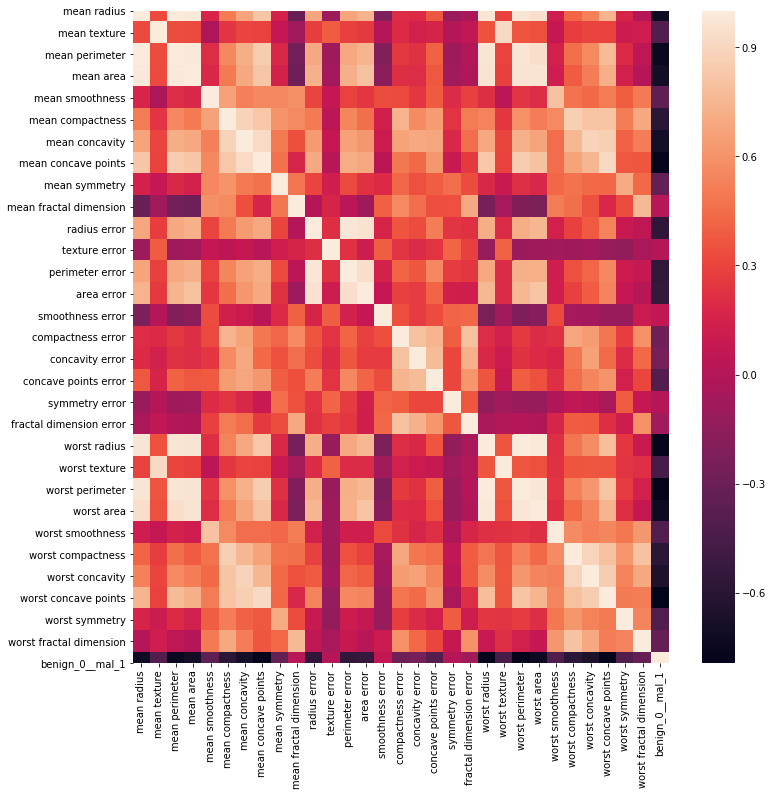

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [19]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
# ------- PART 2 - Dealing with Overfitting and Evaluation ------

In [28]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout

In [30]:
X_train.shape

(426, 30)

In [32]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# use sigmoid because this is a binary classification 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [33]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6569 - val_loss: 0.6376
Epoch 2/600
426/426 [==============================] - 0s 127us/sample - loss: 0.6161 - val_loss: 0.5974
Epoch 3/600
426/426 [==============================] - 0s 128us/sample - loss: 0.5734 - val_loss: 0.5523
Epoch 4/600
426/426 [==============================] - 0s 123us/sample - loss: 0.5300 - val_loss: 0.5066
Epoch 5/600
426/426 [==============================] - 0s 132us/sample - loss: 0.4847 - val_loss: 0.4609
Epoch 6/600
426/426 [==============================] - 0s 130us/sample - loss: 0.4393 - val_loss: 0.4128
Epoch 7/600
426/426 [==============================] - 0s 134us/sample - loss: 0.3949 - val_loss: 0.3664
Epoch 8/600
426/426 [==============================] - 0s 133us/sample - loss: 0.3523 - val_loss: 0.3261
Epoch 9/600
426/426 [==============================] - 0s 180us/sample - loss: 0.3164 - val_loss: 0.2901
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0580 - val_loss: 0.1225
Epoch 79/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0574 - val_loss: 0.1251
Epoch 80/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0542 - val_loss: 0.1319
Epoch 81/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0536 - val_loss: 0.1246
Epoch 82/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0564 - val_loss: 0.1336
Epoch 83/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0534 - val_loss: 0.1226
Epoch 84/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0540 - val_loss: 0.1298
Epoch 85/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0531 - val_loss: 0.1219
Epoch 86/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0536 - val_loss: 0.1314
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0420 - val_loss: 0.1336
Epoch 156/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0405 - val_loss: 0.1338
Epoch 157/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0419 - val_loss: 0.1526
Epoch 158/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0456 - val_loss: 0.1386
Epoch 159/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0397 - val_loss: 0.1354
Epoch 160/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0400 - val_loss: 0.1441
Epoch 161/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0417 - val_loss: 0.1362
Epoch 162/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0390 - val_loss: 0.1424
Epoch 163/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0396 - val_loss: 0.1413
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 119us/sample - loss: 0.0295 - val_loss: 0.1441
Epoch 232/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0326 - val_loss: 0.1496
Epoch 233/600
426/426 [==============================] - 0s 163us/sample - loss: 0.0457 - val_loss: 0.1472
Epoch 234/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0347 - val_loss: 0.1605
Epoch 235/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0310 - val_loss: 0.1403
Epoch 236/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0295 - val_loss: 0.1506
Epoch 237/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0291 - val_loss: 0.1438
Epoch 238/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0291 - val_loss: 0.1522
Epoch 239/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0280 - val_loss: 0.1431
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 130us/sample - loss: 0.0221 - val_loss: 0.1662
Epoch 308/600
426/426 [==============================] - 0s 123us/sample - loss: 0.0228 - val_loss: 0.1630
Epoch 309/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0211 - val_loss: 0.1692
Epoch 310/600
426/426 [==============================] - 0s 123us/sample - loss: 0.0229 - val_loss: 0.1571
Epoch 311/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0230 - val_loss: 0.1814
Epoch 312/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0238 - val_loss: 0.1542
Epoch 313/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0223 - val_loss: 0.1699
Epoch 314/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0205 - val_loss: 0.1672
Epoch 315/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0215 - val_loss: 0.1793
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 131us/sample - loss: 0.0161 - val_loss: 0.2018
Epoch 384/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0158 - val_loss: 0.1875
Epoch 385/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0188 - val_loss: 0.1841
Epoch 386/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0190 - val_loss: 0.1759
Epoch 387/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0201 - val_loss: 0.2272
Epoch 388/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0164 - val_loss: 0.1835
Epoch 389/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0177 - val_loss: 0.2083
Epoch 390/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0229 - val_loss: 0.1566
Epoch 391/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0194 - val_loss: 0.2077
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 170us/sample - loss: 0.0135 - val_loss: 0.1926
Epoch 460/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0127 - val_loss: 0.2256
Epoch 461/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0145 - val_loss: 0.2315
Epoch 462/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0139 - val_loss: 0.2142
Epoch 463/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0155 - val_loss: 0.2391
Epoch 464/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0241 - val_loss: 0.1726
Epoch 465/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0131 - val_loss: 0.2447
Epoch 466/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0126 - val_loss: 0.1963
Epoch 467/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0160 - val_loss: 0.2304
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 129us/sample - loss: 0.0112 - val_loss: 0.2808
Epoch 536/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0183 - val_loss: 0.2428
Epoch 537/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0278 - val_loss: 0.3562
Epoch 538/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0070 - val_loss: 0.2505
Epoch 539/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0118 - val_loss: 0.3075
Epoch 540/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0120 - val_loss: 0.2733
Epoch 541/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0104 - val_loss: 0.2856
Epoch 542/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0105 - val_loss: 0.2745
Epoch 543/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0106 - val_loss: 0.2869
Epoch 544/600
426/426 [============================

In [34]:
losses = pd.DataFrame(model.history.history)

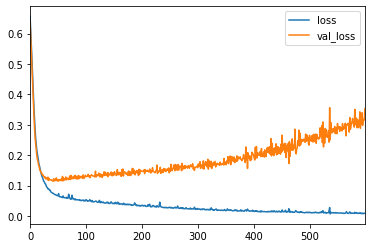

In [35]:
losses.plot()

In [36]:
#   Early Stopping
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# use sigmoid because this is a binary classification 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
#help(EarlyStopping)

In [40]:
# minimize loss, maximize accuracy. see help EarlyStopping. wait for 25 epochs
early_stop = EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [41]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6829 - val_loss: 0.6654
Epoch 2/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6486 - val_loss: 0.6328
Epoch 3/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6140 - val_loss: 0.5930
Epoch 4/600
426/426 [==============================] - 0s 126us/sample - loss: 0.5746 - val_loss: 0.5476
Epoch 5/600
426/426 [==============================] - 0s 126us/sample - loss: 0.5302 - val_loss: 0.4987
Epoch 6/600
426/426 [==============================] - 0s 124us/sample - loss: 0.4839 - val_loss: 0.4506
Epoch 7/600
426/426 [==============================] - 0s 136us/sample - loss: 0.4393 - val_loss: 0.4019
Epoch 8/600
426/426 [==============================] - 0s 127us/sample - loss: 0.3915 - val_loss: 0.3609
Epoch 9/600
426/426 [==============================] - 0s 136us/sample - loss: 0.3493 - val_loss: 0.3167
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0536 - val_loss: 0.1004
Epoch 79/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0527 - val_loss: 0.1039
Epoch 80/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0524 - val_loss: 0.1030
Epoch 81/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0524 - val_loss: 0.1024
Epoch 82/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0535 - val_loss: 0.1019
Epoch 00082: early stopping


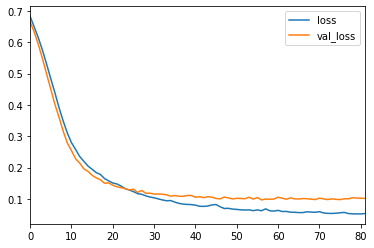

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
#  ----- turn on Dropouts  -----

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()

model.add(Dense(30, activation='relu'))
# 1 = 100% neuron dropped, 0 = no neuron dropped randomly
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# use sigmoid because this is a binary classification 
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7001 - val_loss: 0.6868
Epoch 2/600
426/426 [==============================] - 0s 140us/sample - loss: 0.6828 - val_loss: 0.6729
Epoch 3/600
426/426 [==============================] - 0s 130us/sample - loss: 0.6719 - val_loss: 0.6595
Epoch 4/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6516 - val_loss: 0.6398
Epoch 5/600
426/426 [==============================] - 0s 130us/sample - loss: 0.6322 - val_loss: 0.6136
Epoch 6/600
426/426 [==============================] - 0s 139us/sample - loss: 0.6239 - val_loss: 0.5843
Epoch 7/600
426/426 [==============================] - 0s 133us/sample - loss: 0.5899 - val_loss: 0.5547
Epoch 8/600
426/426 [==============================] - 0s 143us/sample - loss: 0.5700 - val_loss: 0.5241
Epoch 9/600
426/426 [==============================] - 0s 143us/sample - loss: 0.5572 - val_loss: 0.4899
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 133us/sample - loss: 0.1186 - val_loss: 0.1198
Epoch 79/600
426/426 [==============================] - 0s 137us/sample - loss: 0.1026 - val_loss: 0.1027
Epoch 80/600
426/426 [==============================] - 0s 142us/sample - loss: 0.1122 - val_loss: 0.1233
Epoch 81/600
426/426 [==============================] - 0s 136us/sample - loss: 0.1087 - val_loss: 0.1227
Epoch 82/600
426/426 [==============================] - 0s 135us/sample - loss: 0.1189 - val_loss: 0.1017
Epoch 83/600
426/426 [==============================] - 0s 138us/sample - loss: 0.1054 - val_loss: 0.1145
Epoch 84/600
426/426 [==============================] - 0s 141us/sample - loss: 0.1008 - val_loss: 0.1112
Epoch 85/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0931 - val_loss: 0.1136
Epoch 86/600
426/426 [==============================] - 0s 143us/sample - loss: 0.1123 - val_loss: 0.1116
Epoch 87/600
426/426 [========================

In [48]:
model_loss=pd.DataFrame(model.history.history)

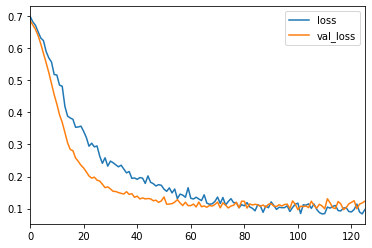

In [49]:
model_loss.plot()

In [51]:
# ------ evaluate classes -----
predictions = model.predict_classes(X_test)

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [54]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]


In [55]:
# 1 false positive, 5 false negative